### 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()  # 鸢尾花数据集

In [5]:
X= iris.data
y = iris.target
X = X[y<2,:2]  #  节选两类0，1，节选两个特征
y = y[y<2]     # 

In [6]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

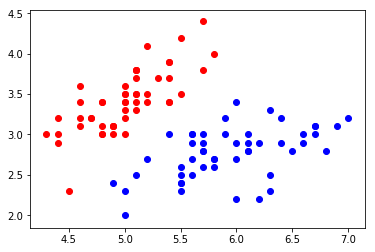

In [8]:
plt.scatter(X[y==0,0],X[y==0,1],color = "r")
plt.scatter(X[y==1,0],X[y==1,1],color = "blue")

### 使用逻辑回归

In [10]:
from playML.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,seed = 666)

In [11]:
from playML.LogisticRegression import LogisticRegression

In [12]:
log_reg = LogisticRegression()  #   

In [13]:
log_reg.fit(X_train,y_train)  # call  __repr__() magic method

  hello LogisticRegression()

In [14]:
log_reg.score(X_test,y_test)  # 

1.0

In [15]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [16]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [17]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [18]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [19]:
log_reg.intercept_

-0.6937719272911228

### 决策边界

In [22]:
def x2(x1):  # y
    return (-log_reg.coef_[0]*x1 - log_reg.intercept_)/log_reg.coef_[1]  #   y  = f(x)

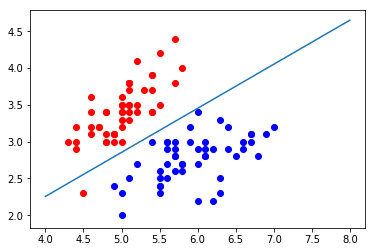

In [25]:
X1_plot = np.linspace(4,8,1000)
X2_plot = x2(X1_plot)
plt.plot(X1_plot,X2_plot)
plt.scatter(X[y==0,0],X[y==0,1],color = "r")   # 图像中有一个分错的点，应该是在训练的过程中分错的，准确率为1 说明对于测试数据集是完全是正确的
plt.scatter(X[y==1,0],X[y==1,1],color = "blue")

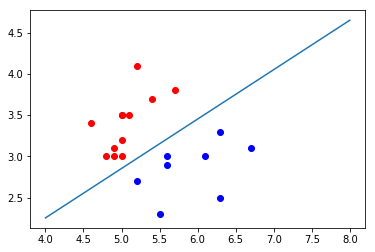

In [26]:
X1_plot = np.linspace(4,8,1000)
X2_plot = x2(X1_plot)
plt.plot(X1_plot,X2_plot)
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],color = "r")   # 图像中有一个分错的点，应该是在训练的过程中分错的，准确率为1 说明对于测试数据集是完全是正确的
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],color = "blue")

### 不规则的决策边界

In [32]:
def plot_decision_boundary(model,axis):  # 后续更改
  
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1)
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A",'#FFF59D',"#90CAF9"])
    
    plt.contourf(x0,x1,zz,linewidth = 5,cmap = custom_cmap) 

SyntaxError: invalid syntax (<ipython-input-32-4112627c9d8d>, line 5)

In [31]:
plot_decision_boundary(log_reg,axis = [4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

NameError: name 'plot_decision_boundary' is not defined

### kNN的决策边界

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
knn_clf.score(X_test,y_test)

1.0

In [ ]:
plot_decision_boundary(knn_clf,axis = [4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [35]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
plot_decision_boundary(knn_clf,axis = [4,8,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])